# WQD 7012 AML Mid Term Part 1

## Student Details

- Name: Khor Kean Teng
- Matric No: U2004763
- Tasks: Mid Term Examination
- Data: Set 4

## Instructions

Work individually. Answer all the questions. Explain adequately how you get the answers that can include: 1) codes or process used; and 2) print screens and/or related files that can justify your outcome. Please create a word file in .docx (or in .ipynb) to explain your answer. Convert the file to pdf format and submit to the spectrum “Mid Term” submission page. 

In [1]:
# import libraries
import pandas as pd
import warnings


# turn off warnings
warnings.filterwarnings("ignore")

## Question 1

Download one of the diabetes datasets in CSV format. Please refer to Appendix 1 (at the end of the document) on which dataset you should download. Load the data and preprocess whenever necessary. (2 marks) 

> My part is Set 4.csv

In [2]:
# load the data
df = pd.read_csv('data/Set04.csv')

# make a copy
df_1 = df.copy()

# preview the data
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,107,74,30,100,33.6,0.404,23,0
1,2,75,64,24,55,29.7,0.370,33,0
2,6,107,88,0,0,36.8,0.727,31,0
3,2,93,64,32,160,38.0,0.674,23,1
4,5,189,64,33,325,31.2,0.583,29,1


The above output shows that the dataset has been successfully loaded into a pandas DataFrame. The first few rows of the dataset are displayed, which gives an overview of the data structure and the types of information contained within it. Now let's check for any missing values in the dataset.

In [3]:
# check for missing values
missing_values = df.isnull().sum()

# display missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


The output shows that there are no missing values in any of the columns, which is a good sign as it indicates that the dataset is complete and ready for analysis. However, do note that the scale for each data could be different we have age, BMI, insulin and so on, we would need to scale the data if we would need to use if for further machine learning tasks.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract first 7 columns as features
features = df.iloc[:, :7]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# show the scaled features
scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print("\nScaled Features:")
display(scaled_df.head())


Scaled Features:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,-0.567041,-0.446789,0.329646,0.590047,0.137002,0.295355,-0.216702
1,-0.567041,-1.425160,-0.190574,0.213821,-0.257353,-0.170241,-0.318463
2,0.639429,-0.446789,1.057954,-1.291080,-0.739341,0.677383,0.750030
3,-0.567041,-0.874826,-0.190574,0.715455,0.662807,0.820643,0.591402
4,0.337811,2.060285,-0.190574,0.778159,2.108773,0.008834,0.319041


Now we will perform standard scaling on the first 7 columns which are the features of the dataset. Standard scaling will normalize the data to have a mean of 0 and a standard deviation of 1, which is often beneficial for machine learning algorithms. From the output we can see that the first 7 columns have been successfully scaled. The values in these columns now have a mean of approximately 0 and a standard deviation of approximately 1, which is the desired outcome of standard scaling.

In [5]:
# add the Age and Outcome from df to the last 2 columns of scaled_df
scaled_df['Age'] = df['Age']
scaled_df['Outcome'] = df['Outcome']

# show the updated scaled_df
print("\nUpdated Scaled Features with Age and Outcome:")
display(scaled_df.head())


Updated Scaled Features with Age and Outcome:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.567041,-0.446789,0.329646,0.590047,0.137002,0.295355,-0.216702,23,0
1,-0.567041,-1.425160,-0.190574,0.213821,-0.257353,-0.170241,-0.318463,33,0
2,0.639429,-0.446789,1.057954,-1.291080,-0.739341,0.677383,0.750030,31,0
3,-0.567041,-0.874826,-0.190574,0.715455,0.662807,0.820643,0.591402,23,1
4,0.337811,2.060285,-0.190574,0.778159,2.108773,0.008834,0.319041,29,1


Now we can see that the columns like `Age` and `Outcome` which are the target variables are added back to the scaled DataFrame. This is important because we want to keep the target variable intact for any further analysis or modeling. The final DataFrame now contains the scaled features along with the original target variable. The data at this stage has been preprocessed and is ready for further analysis or modeling tasks.

## Question 2

Perform K-means clustering, using the first 7 columns of the dataset as your features. Find out the optimum number of clusters, and explain what the resulting clusters mean, to the best of your understanding. (2 marks) 

Let's perform K-means clustering on the dataset using the first 7 columns as features. We will use the Elbow method to determine the optimum number of clusters. We will also determine the optimum number of clusters.

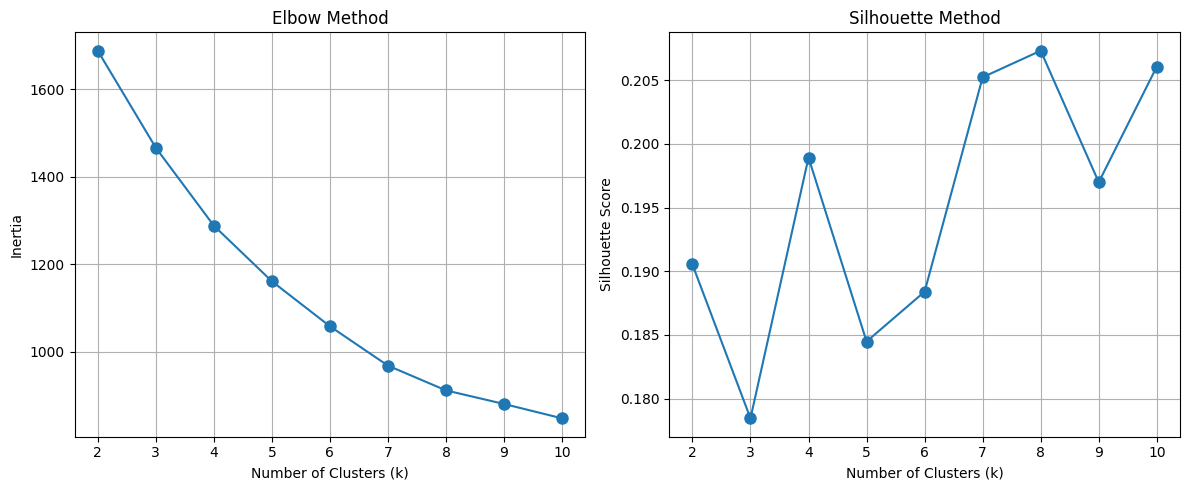

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the scaled features that you've already prepared
X = features_scaled

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only valid for k >= 2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

We can see the graphs are create to visualize the elbow method and silhouette method output, let's add some calculations before diving in to explain the results. We will display the exact number of inertia and silhouette score for each number of clusters. Also we calculate the successive differences in inertia to see the change in inertia clearly.

In [7]:
# print the inertia values for each k
print("\nInertia values for each k:")
display(inertia)

# find the difference between consecutive inertia values
inertia_diff = np.diff(inertia)
# print the inertia differences
print("\nInertia differences between consecutive k values:")
display(inertia_diff)

# print the silhouette scores for each k
print("\nSilhouette scores for each k:")
display(silhouette_scores)


Inertia values for each k:


[1688.2815166843957,
 1466.5652633927625,
 1288.3738808342493,
 1161.2547901806665,
 1058.383161439283,
 968.4175019835668,
 911.8444646103176,
 880.8043044594998,
 847.9914182554132]


Inertia differences between consecutive k values:


array([-221.71625329, -178.19138256, -127.11909065, -102.87162874,
        -89.96565946,  -56.57303737,  -31.04016015,  -32.8128862 ])


Silhouette scores for each k:


[0.19053036321433894,
 0.17844293069316422,
 0.19893285808380767,
 0.18447736049882238,
 0.1883960654912759,
 0.205241022385718,
 0.20732606652818747,
 0.19699583753985597,
 0.20607107953023202]

Using the elbow method, we plot the within-cluster sum of squares (inertia) against k. The "elbow" point, where inertia decreases more slowly, suggests the optimum. The curve shows a steep drop from k = 2 to k = 5 as we can see from the inertia differences there are almost 3 digits difference at start, then slows down from k = 5 to k = 6. The elbow isn’t sharply defined, but k = 4 or k = 5 appears reasonable, as the rate of decrease diminishes significantly after k = 4. 

On the other hand, using the silhouette method which measures how similar each point is to its own cluster versus other clusters. Higher scores indicate better-defined clusters, and the peak score suggests the optimum k. The highest silhouette score is at k = 8, but k = 7 is a local peak after fluctuations. This suggests k = 7 provides the best-defined clusters, balancing cohesion and separation. The Silhouette method shows the highest score at k=7, but k=4 also represents a good local peak and aligns with the elbow.

Overall, the Elbow Method suggests k = 4 or 5, where inertia reduction slows while the Silhouette Method clearly favors k = 7 with the highest score and also k = 5 due to a good local peak, indicating well-separated and cohesive clusters.

Often, a balance is sought. While k=7 has the absolute highest silhouette score, k=4 is strongly indicated by the elbow method and has a respectable silhouette score. For interpretability and given the elbow, k=4 is a very strong candidate. If we strictly follow the highest silhouette score, k=7 would be chosen, but this might lead to more granular, less distinct clusters or overfit to the specific dataset used to generate those plots.

Let's proceed with k=4 as a good compromise, supported by a clear elbow and a good silhouette score.


Cluster Centers (Original Scale):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Cluster,,,,,,,,,
0,7.329114,132.177215,77.278481,10.582278,12.860759,31.255696,0.413975,40.594937,0.531646
1,3.200000,106.000000,1.600000,1.266667,1.666667,20.906667,0.335533,29.733333,0.266667
2,3.671875,156.218750,70.937500,34.468750,253.062500,34.895313,0.656719,36.562500,0.625000
3,2.126761,101.788732,67.816901,21.943662,56.852113,30.434507,0.444746,28.267606,0.190141


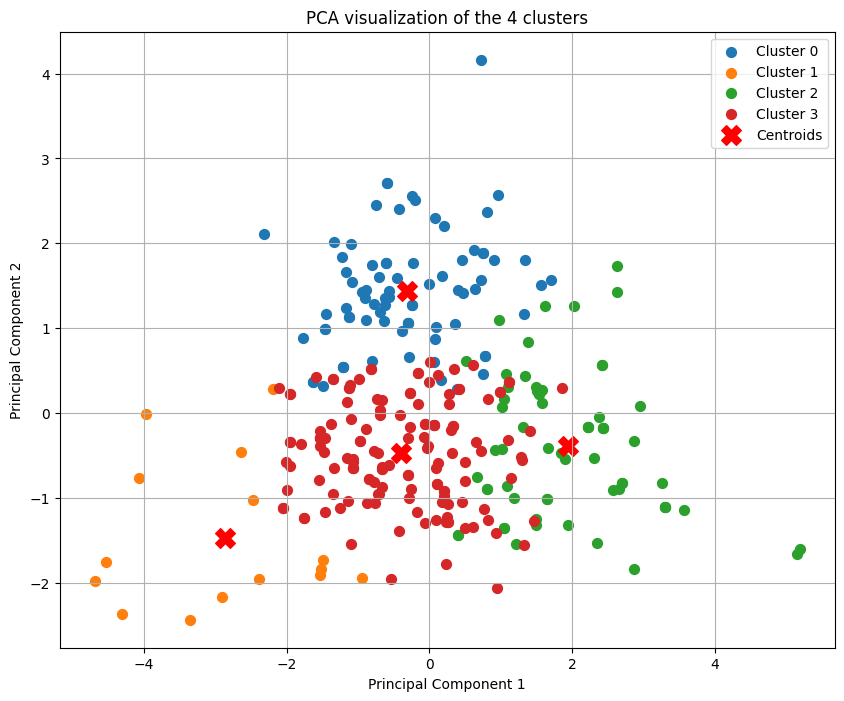


Percentage of diabetes outcome (1) in each cluster:


Outcome,0,1
Cluster,,
0,46.835443,53.164557
1,73.333333,26.666667
2,37.500000,62.500000
3,80.985915,19.014085


In [ ]:
# Based on the elbow method and silhouette scores, choose optimal k

optimal_k = 4

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Examine cluster characteristics
cluster_stats = df.groupby('Cluster').mean()
print("\nCluster Centers (Original Scale):")
display(cluster_stats)

# Visualize clusters using PCA to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                label=f'Cluster {i}', s=50)

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, marker='X', c='red', label='Centroids')

plt.title(f'PCA visualization of the {optimal_k} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Examine relationship between clusters and diabetes outcome
cluster_outcome = pd.crosstab(df['Cluster'], df['Outcome'], normalize='index') * 100
print("\nPercentage of diabetes outcome (1) in each cluster:")
display(cluster_outcome)

The clustering algorithm has grouped the individuals into 4 distinct clusters based on their 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction' values. The 'Outcome' column in the table represents the average outcome (presumably 0 for no diabetes, 1 for diabetes) for individuals within each cluster. This is very helpful for interpretation.

**Cluster 0: Older, Higher Multi-Risk Factors, High Diabetes Incidence**

- Pregnancies: Moderate (3.2)
- Glucose: Moderately Low (106.0)
- BloodPressure: Extremely Low (1.6) - This value is physiologically improbable and strongly suggests that '0' values (often used for missing data in this dataset) were treated as actual measurements and significantly skewed this cluster's average. The same applies to SkinThickness and Insulin.
- SkinThickness: Extremely Low (1.2) - Likely influenced by '0's.
- Insulin: Extremely Low (1.6) - Likely influenced by '0's.
- BMI: Lowest (20.9) - Healthy to underweight range.
- DiabetesPedigreeFunction: Lowest (0.33)
- Age: Moderately Young (29.7)
- Outcome: Moderate-Low (0.26) - Approximately 26% have diabetes.
- Interpretation: This cluster seems to group younger individuals with the lowest BMI and diabetes pedigree function. The extremely low values for BloodPressure, SkinThickness, and Insulin are highly indicative that this cluster has attracted many individuals where these features were recorded as '0' (missing values). Despite the "healthier" BMI and glucose, the diabetes incidence is still notable at 26%, perhaps driven by other uncaptured factors or the inherent risk in the Pima Indian population. If '0's were actual measurements (e.g. for insulin), it would have different implications. Given the context of the Pima dataset, they are almost certainly missing values.

**Cluster 1: Younger, Lower Physiological Measures (Potentially Many Zeros), Moderate Diabetes Incidence**

- Pregnancies: Moderate (3.2)
- Glucose: Moderately Low (106.0)
- BloodPressure: Extremely Low (1.6) - This value is physiologically improbable and strongly suggests that '0' values (often used for missing data in this dataset) were treated as actual measurements and significantly skewed this cluster's average. The same applies to SkinThickness and Insulin.
- SkinThickness: Extremely Low (1.2) - Likely influenced by '0's.
- Insulin: Extremely Low (1.6) - Likely influenced by '0's.
- BMI: Lowest (20.9) - Healthy to underweight range.
- DiabetesPedigreeFunction: Lowest (0.33)
- Age: Moderately Young (29.7)
- Outcome: Moderate-Low (0.26) - Approximately 26% have diabetes.
- Interpretation: This cluster seems to group younger individuals with the lowest BMI and diabetes pedigree function. The extremely low values for BloodPressure, SkinThickness, and Insulin are highly indicative that this cluster has attracted many individuals where these features were recorded as '0' (missing values). Despite the "healthier" BMI and glucose, the diabetes incidence is still notable at 26%, perhaps driven by other uncaptured factors or the inherent risk in the Pima Indian population. If '0's were actual measurements (e.g. for insulin), it would have different implications. Given the context of the Pima dataset, they are almost certainly missing values.

**Cluster 2: High Risk, Classic Insulin Resistance, Highest Diabetes Incidence**

- Pregnancies: Moderate (3.6)
- Glucose: Highest (156.2)
- BloodPressure: Moderate (70.9)
- SkinThickness: Highest (34.4)
- Insulin: Highest (253.0) - This is very high, indicating significant insulin resistance (body produces a lot of insulin, but it's not effective).
- BMI: Highest (34.8) - Obese range.
- DiabetesPedigreeFunction: Highest (0.65)
- Age: Moderate-High (36.5)
- Outcome: Highest (0.62) - Approximately 62% have diabetes.
- Interpretation: This cluster represents a group with the most pronounced classic risk factors for Type 2 diabetes. They have the highest glucose, skin thickness (often correlated with body fat/insulin resistance), insulin levels (hallmark of insulin resistance), BMI, and diabetes pedigree function. Unsurprisingly, this cluster has the highest proportion of individuals with diabetes. This is the "highest risk for (or already developed) Type 2 Diabetes" group.

**Cluster 3: Younger, Generally Healthier Profile, Lowest Diabetes Incidence**

- Pregnancies: Lowest (2.1)
- Glucose: Lowest (101.7) - Normal range.
- BloodPressure: Lowest (among non-zero-skewed clusters) (67.8) - Normal range.
- SkinThickness: Moderate (21.9)
- Insulin: Moderate (56.8)
- BMI: Moderately High (30.4) - Borderline obese, but lower than clusters 0 and 2.
- DiabetesPedigreeFunction: Moderate (0.44)
- Age: Lowest (28.2)
- Outcome: Lowest (0.19) - Approximately 19% have diabetes.
- Interpretation: This cluster represents the youngest group with the fewest pregnancies. They generally have the lowest or more moderate (healthier) values for glucose, blood pressure, and relatively lower insulin compared to high-risk groups. While their BMI is still somewhat elevated, their overall profile suggests lower risk, which is reflected in the lowest diabetes incidence among the four clusters.

The PCA plot shows how these clusters are separated in a 2-dimensional space (representing the 7 original features). Cluster 1 (Orange) appears somewhat distinct, particularly in the bottom-left quadrant, which might reflect its members having consistently low values across several features (or many zeros). Cluster 3 (Red) forms a large central group. Cluster 0 (Blue) and Cluster 2 (Green) are more spread out and show some overlap with each other and with Cluster 3, especially Cluster 2. This suggests that while the centroids (average profiles) are different, there are individuals at the boundaries of these clusters who share some characteristics. The Centroids (Red X) are visibly separated, indicating that the algorithm found distinct centers for these groups.

In terms of risk stratification, the clusters effectively stratify individuals by diabetes risk, with Cluster 2 being highest risk, Cluster 0 high risk with specific insulin characteristics, Cluster 1 moderate-low (but influenced by potential data issues), and Cluster 3 lowest risk. For the influence of zeroes, note that Cluster 1 is strongly characterized by extremely low (likely zero) values for BloodPressure, SkinThickness, and Insulin. This highlights the importance of data preprocessing – how these '0's (missing values) were handled before clustering significantly impacts the results. If they were imputed, the cluster might look different. Though there are a few actionable insights can be derived from the clusters.

- Cluster 2: Individuals here need intensive management and intervention due to high insulin resistance.
- Cluster 0: The low insulin with high glucose suggests a need for specific medical evaluation, potentially different treatment strategies than Cluster 2.
- Cluster 3: Could be a target for preventative education due to their relatively better health profile but still existing risk (BMI is still somewhat high).
- Cluster 1: Data quality for these individuals, especially for BP, SkinThickness, and Insulin, should be reviewed if taking further action.

All in all K=4 seems to provide reasonably interpretable clusters, each with a distinct enough profile to suggest different underlying health states or risk levels related to diabetes.

## Question 3

Train linear regression model, using the first 7 columns of the dataset as your features, and the 8th column as your target variable. Evaluate the outcome with and without data preprocessing. (3 marks)  

### 3.1 Without Data Preprocessing

In [9]:
# use the original data
df_lr = df_1.copy()

# display the first few rows of the original data with clusters
display(df_lr.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,107,74,30,100,33.6,0.404,23,0
1,2,75,64,24,55,29.7,0.370,33,0
2,6,107,88,0,0,36.8,0.727,31,0
3,2,93,64,32,160,38.0,0.674,23,1
4,5,189,64,33,325,31.2,0.583,29,1


Now load the data original data without preprocessing

In [10]:
# train test split
from sklearn.model_selection import train_test_split

# Define features (first 7 columns) and target (Age column)
X = df_lr.iloc[:, :7]  # First 7 columns as features (Pregnancies through DiabetesPedigreeFunction)
y = df_lr['Age']       # 8th column (Age) as target variable

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (240, 7)
Test set shape: (60, 7)
Training target shape: (240,)
Test target shape: (60,)


Split them into training and testing set in ratio of 80:20

In [11]:
# show the X_train and y_test
print("\nTraining Features (X_train):")
display(X_train.head())

# show the y_train
print("\nTraining Labels (y_train):")
display(y_train.head())


Training Features (X_train):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
232,5,124,74,0,0,34.0,0.220
59,4,114,65,0,0,21.9,0.432
6,1,135,54,0,0,26.7,0.687
185,1,100,74,12,46,19.5,0.149
173,1,164,82,43,67,32.8,0.341



Training Labels (y_train):


232    38
59     37
6      62
185    28
173    50
Name: Age, dtype: int64

Check if the data used is correct

Linear Regression Model Results:
Mean Squared Error: 81.7621
R² Score: 0.4412

Feature Coefficients:


,Feature,Coefficient
6,DiabetesPedigreeFunction,3.287212
0,Pregnancies,1.630225
1,Glucose,0.089472
2,BloodPressure,0.086116
3,SkinThickness,-0.039998
5,BMI,-0.016263
4,Insulin,-0.005184


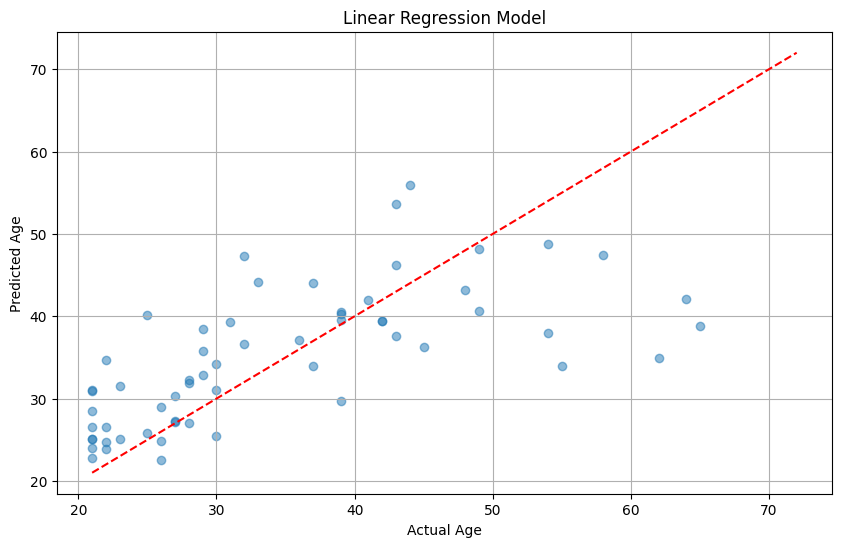

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
feature_names = X.columns
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
display(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Linear Regression Model')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.grid(True)
plt.show()

The linear regression model, applied directly to the raw features to predict age, demonstrates limited predictive capability. The R² score of 0.4412 indicates that approximately 44.12% of the variance in age can be explained by the chosen features in this linear model, leaving a significant portion unexplained. The Mean Squared Error of 81.7621 suggests that, on average, the model's predictions deviate from the actual age by roughly 9 years (square root of MSE), which is a considerable margin. The scatter plot visually supports this, showing a general positive trend where predicted age increases with actual age, but with substantial scatter of individual predictions around the ideal y=x line, indicating many predictions are quite far off. According to the feature coefficients, DiabetesPedigreeFunction (coefficient ≈ 3.29) and Pregnancies (coefficient ≈ 1.63) are the strongest positive linear predictors of age, while features like Insulin, BMI, and SkinThickness show very weak negative associations. The overall modest performance highlights that a simple linear model without preprocessing may not be sufficient to accurately capture the relationship between these features and age.

### 3.2 With Data Preprocessing

In [13]:
# use the original data
df_lr = scaled_df.copy()

# display the first few rows of the original data with clusters
display(df_lr.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.567041,-0.446789,0.329646,0.590047,0.137002,0.295355,-0.216702,23,0
1,-0.567041,-1.425160,-0.190574,0.213821,-0.257353,-0.170241,-0.318463,33,0
2,0.639429,-0.446789,1.057954,-1.291080,-0.739341,0.677383,0.750030,31,0
3,-0.567041,-0.874826,-0.190574,0.715455,0.662807,0.820643,0.591402,23,1
4,0.337811,2.060285,-0.190574,0.778159,2.108773,0.008834,0.319041,29,1


Now load the data after preprocessing

In [14]:
# train test split
from sklearn.model_selection import train_test_split

# Define features (first 7 columns) and target (Age column)
X = df_lr.iloc[:, :7]  # First 7 columns as features (Pregnancies through DiabetesPedigreeFunction)
y = df_lr['Age']       # 8th column (Age) as target variable

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (240, 7)
Test set shape: (60, 7)
Training target shape: (240,)
Test target shape: (60,)


Split them into training and testing set in ratio of 80:20

In [15]:
# show the X_train and y_test
print("\nTraining Features (X_train):")
display(X_train.head())

# show the y_train
print("\nTraining Labels (y_train):")
display(y_train.head())


Training Features (X_train):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
232,0.337811,0.072970,0.329646,-1.291080,-0.739341,0.343109,-0.767409
59,0.036194,-0.232771,-0.138552,-1.291080,-0.739341,-1.101434,-0.132898
6,-0.868658,0.409285,-0.710794,-1.291080,-0.739341,-0.528392,0.630311
185,-0.868658,-0.660808,0.329646,-0.538629,-0.336224,-1.387955,-0.979911
173,-0.868658,1.295933,0.745822,1.405201,-0.152192,0.199848,-0.405259



Training Labels (y_train):


232    38
59     37
6      62
185    28
173    50
Name: Age, dtype: int64

Check if the data used is correct

Linear Regression Model Results:
Mean Squared Error: 81.7621
R² Score: 0.4412

Feature Coefficients:


,Feature,Coefficient
0,Pregnancies,5.404944
1,Glucose,2.926395
2,BloodPressure,1.655369
6,DiabetesPedigreeFunction,1.098309
3,SkinThickness,-0.637879
4,Insulin,-0.591513
5,BMI,-0.136222


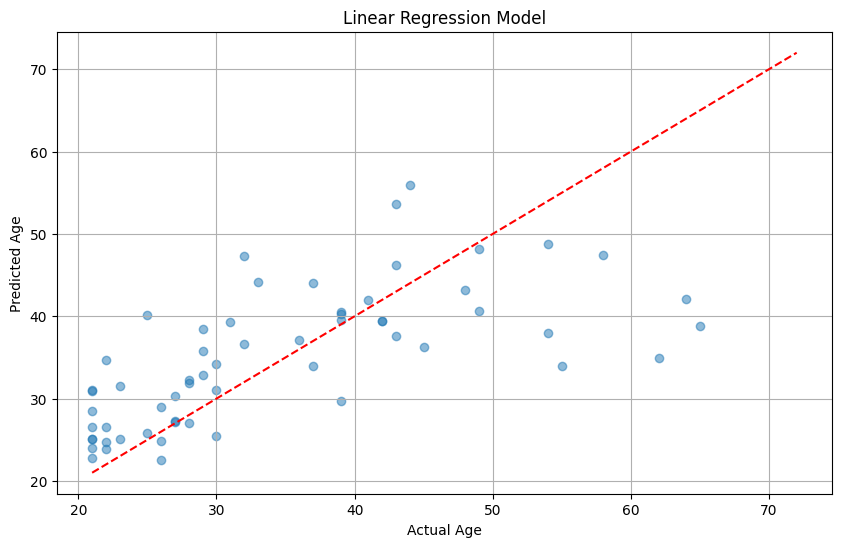

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train linear regression model 
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
feature_names = X.columns
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
display(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Linear Regression Model')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.grid(True)
plt.show()

The linear regression model, applied to preprocessed data using standard scaling to predict age, demonstrates moderate predictive capability with an R² score of 0.4412, indicating that approximately 44.1% of the variance in age is explained by the included features. The Mean Squared Error is 81.7621, which translates to a Root Mean Squared Error of roughly 9.04 years, suggesting a notable average error in age prediction. Examining the feature coefficients (which, due to standard scaling, represent the change in predicted age for a one standard deviation increase in the feature), 'Pregnancies' has the most substantial positive influence on predicted age (coefficient ≈ 5.40), followed by 'Glucose' (≈ 2.93) and 'BloodPressure' (≈ 1.66). Conversely, 'SkinThickness' (≈ -0.64), 'Insulin' (≈ -0.59), and 'BMI' (≈ -0.14) show negative associations, meaning an increase in these features (by one standard deviation) corresponds to a decrease in predicted age. The scatter plot of predicted versus actual age visually confirms this moderate fit, with points scattered around the ideal prediction line, indicating the model captures some general trends but also exhibits considerable individual prediction errors.

**Conclusion**

Based on the provided metrics, both approaches yield identical predictive performance, with an R² of 0.4412 and an MSE of 81.7621. This is because standard scaling, for a basic linear regression model without regularization, only rescales the features and thus the coefficients, but it does not change the fundamental linear relationship the model can capture or its overall goodness-of-fit. While the interpretation of the coefficients changes (from per-unit change to per-standard-deviation change), the model's ability to explain variance or its average prediction error remains the same. Therefore, in terms of pure predictive accuracy for this specific scenario, neither is demonstrably better; however, preprocessing with standard scaling is generally a good practice as it can make coefficients more directly comparable for feature importance and is often a prerequisite or beneficial for more complex algorithms or when regularization is applied, even if it showed no improvement here.

## Question 4

Train decision tree model, using the first 7 columns of the dataset as your features, and the 9th column as your target variable. Evaluate the outcome with and without data preprocessing. (3 marks)  

### 4.1 Without Data Preprocessing

In [17]:
# use the original data
df_lr = df_1.copy()

# display the first few rows of the original data with clusters
display(df_lr.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,107,74,30,100,33.6,0.404,23,0
1,2,75,64,24,55,29.7,0.370,33,0
2,6,107,88,0,0,36.8,0.727,31,0
3,2,93,64,32,160,38.0,0.674,23,1
4,5,189,64,33,325,31.2,0.583,29,1


Now load the data original data without preprocessing

In [18]:
# train test split
from sklearn.model_selection import train_test_split

# Define features (first 7 columns) and target (Age column)
X = df_lr.iloc[:, :7]  # First 7 columns as features (Pregnancies through DiabetesPedigreeFunction)
y = df_lr['Outcome']       # 8th column (Age) as target variable

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (240, 7)
Test set shape: (60, 7)
Training target shape: (240,)
Test target shape: (60,)


Split them into training and testing set in ratio of 80:20

In [19]:
# show the X_train and y_test
print("\nTraining Features (X_train):")
display(X_train.head())

# show the y_train
print("\nTraining Labels (y_train):")
display(y_train.head())


Training Features (X_train):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
232,5,124,74,0,0,34.0,0.220
59,4,114,65,0,0,21.9,0.432
6,1,135,54,0,0,26.7,0.687
185,1,100,74,12,46,19.5,0.149
173,1,164,82,43,67,32.8,0.341



Training Labels (y_train):


232    1
59     0
6      0
185    0
173    0
Name: Outcome, dtype: int64

Check if the data used is correct

Decision Tree Classification for Diabetes Outcome Prediction:
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.76      0.70      0.73        23

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60



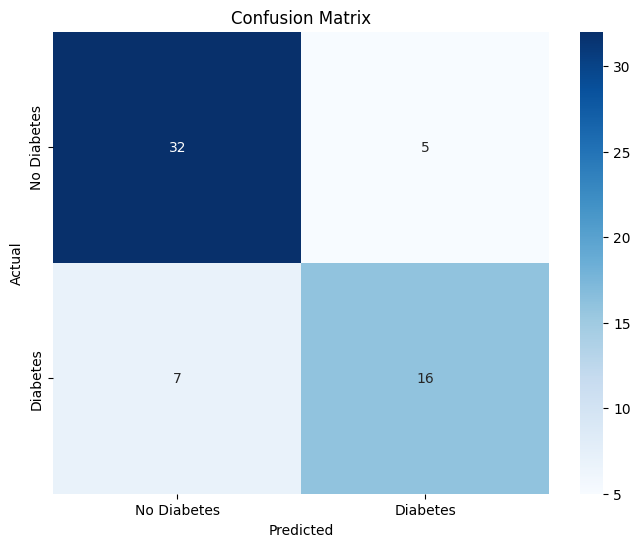

In [20]:
# Import necessary libraries for decision tree classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree without preprocessing
print("Decision Tree Classification for Diabetes Outcome Prediction:")

# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The decision tree model, applied without any data preprocessing, achieved an overall accuracy of 80.00% in predicting diabetes outcomes. The model demonstrated better performance in identifying individuals without diabetes (class 0: precision 0.82, recall 0.86, F1-score 0.84) compared to identifying individuals with diabetes (class 1: precision 0.76, recall 0.70, F1-score 0.73). Specifically, the confusion matrix reveals that out of 37 actual non-diabetic cases, 32 were correctly identified (True Negatives) and 5 were misclassified as diabetic (False Positives). More critically, out of 23 actual diabetic cases, only 16 were correctly identified (True Positives), while 7 were missed and classified as non-diabetic (False Negatives), indicating a moderate challenge in correctly identifying all positive diabetes cases.

## 4.2 With Data Preprocessing

In [21]:
# use the original data
df_lr = scaled_df.copy()

# display the first few rows of the original data with clusters
display(df_lr.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.567041,-0.446789,0.329646,0.590047,0.137002,0.295355,-0.216702,23,0
1,-0.567041,-1.425160,-0.190574,0.213821,-0.257353,-0.170241,-0.318463,33,0
2,0.639429,-0.446789,1.057954,-1.291080,-0.739341,0.677383,0.750030,31,0
3,-0.567041,-0.874826,-0.190574,0.715455,0.662807,0.820643,0.591402,23,1
4,0.337811,2.060285,-0.190574,0.778159,2.108773,0.008834,0.319041,29,1


Now load the data after preprocessing

In [22]:
# train test split
from sklearn.model_selection import train_test_split

# Define features (first 7 columns) and target (Age column)
X = df_lr.iloc[:, :7]  # First 7 columns as features (Pregnancies through DiabetesPedigreeFunction)
y = df_lr['Outcome']       # 8th column (Age) as target variable

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (240, 7)
Test set shape: (60, 7)
Training target shape: (240,)
Test target shape: (60,)


Split them into training and testing set in ratio of 80:20

In [23]:
# show the X_train and y_test
print("\nTraining Features (X_train):")
display(X_train.head())

# show the y_train
print("\nTraining Labels (y_train):")
display(y_train.head())


Training Features (X_train):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
232,0.337811,0.072970,0.329646,-1.291080,-0.739341,0.343109,-0.767409
59,0.036194,-0.232771,-0.138552,-1.291080,-0.739341,-1.101434,-0.132898
6,-0.868658,0.409285,-0.710794,-1.291080,-0.739341,-0.528392,0.630311
185,-0.868658,-0.660808,0.329646,-0.538629,-0.336224,-1.387955,-0.979911
173,-0.868658,1.295933,0.745822,1.405201,-0.152192,0.199848,-0.405259



Training Labels (y_train):


232    1
59     0
6      0
185    0
173    0
Name: Outcome, dtype: int64

Check if the data used is correct

Decision Tree Classification for Diabetes Outcome Prediction:
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        37
           1       0.76      0.70      0.73        23

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60



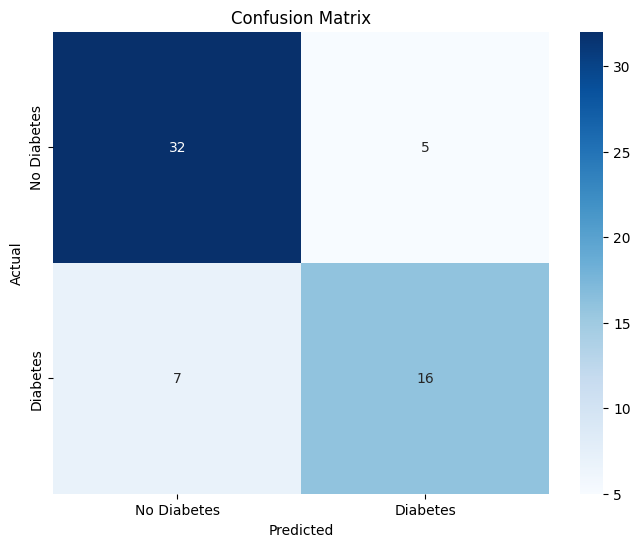

In [24]:
# Import necessary libraries for decision tree classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree without preprocessing
print("Decision Tree Classification for Diabetes Outcome Prediction:")

# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The decision tree classifier, applied to predict the diabetes 'outcome' after data preprocessing including standard scaling, achieved an overall accuracy of 80%. The model demonstrated stronger performance in identifying individuals without diabetes (class 0), with a precision of 0.82 and recall of 0.86, correctly classifying 32 out of 37 actual non-diabetic cases. However, for individuals with diabetes (class 1), the performance was slightly lower, with a precision of 0.76 and a recall of 0.70, meaning it correctly identified 16 out of 23 actual diabetic cases but missed 7 (false negatives), while also misclassifying 5 non-diabetic individuals as diabetic (false positives). This indicates a reasonable but imperfect model, with a notable tendency to miss some actual diabetes cases.

**Conclusion**

The data preprocessing step, specifically standard scaling, had no discernible impact on the decision tree classifier's performance in predicting diabetes outcomes. All reported metrics—overall accuracy (80%), precision (0.82 for class 0, 0.76 for class 1), recall (0.86 for class 0, 0.70 for class 1), and the underlying confusion matrix values (32 True Negatives, 5 False Positives, 16 True Positives, 7 False Negatives)—are identical for both the model with and without preprocessing. This outcome is consistent with the theoretical understanding that decision tree algorithms are generally insensitive to feature scaling, as their splitting criteria are based on thresholds rather than the absolute magnitudes of feature values, meaning scaling typically doesn't alter the optimal splits or the resulting model structure.

# WQD 7012 AML Mid Term Part 2

Based on the outcome in Part 1 Question 3 or Question 4 (pick one of it), improve the outcome using the proposed machine learning solution of your choice. Explain your solution in detail. (5 marks)

## Selection Made: Improve Question 4

Since we notice that preprocessing did not improve the decision tree model on classification, we will try to improve the model by using a Random Forest Classifier, which is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. We will make use of the data without preprocessing and compare the outcome with the decision tree model.

In [25]:
# use the original data
df_lr = df_1.copy()

# display the first few rows of the original data with clusters
display(df_lr.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,107,74,30,100,33.6,0.404,23,0
1,2,75,64,24,55,29.7,0.370,33,0
2,6,107,88,0,0,36.8,0.727,31,0
3,2,93,64,32,160,38.0,0.674,23,1
4,5,189,64,33,325,31.2,0.583,29,1


In [26]:
# train test split
from sklearn.model_selection import train_test_split

# Define features (first 7 columns) and target (Age column)
X = df_lr.iloc[:, :7]  # First 7 columns as features (Pregnancies through DiabetesPedigreeFunction)
y = df_lr['Outcome']       # 8th column (Age) as target variable

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the shape of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training set shape: (240, 7)
Test set shape: (60, 7)
Training target shape: (240,)
Test target shape: (60,)


Random Forest Classification for Diabetes Outcome Prediction:
Basic Random Forest Accuracy: 0.8167

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



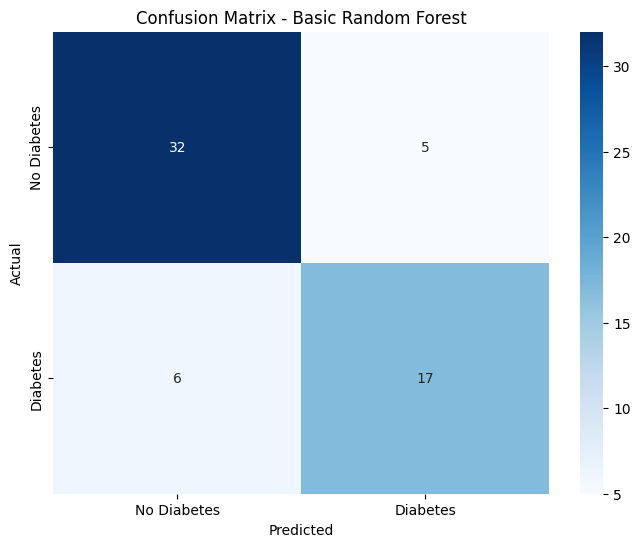

In [27]:
# Import necessary libraries for Random Forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV

print("Random Forest Classification for Diabetes Outcome Prediction:")

# Create and train a basic Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the basic model
accuracy = accuracy_score(y_test, y_pred)
print(f"Basic Random Forest Accuracy: {accuracy:.4f}")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Basic Random Forest')
plt.show()

The basic Random Forest model, when applied directly to the dataset without any preprocessing, achieved an overall accuracy of approximately 81.7% for diabetes outcome prediction. The model demonstrated better performance in identifying individuals without diabetes (class 0), correctly classifying 32 out of 37 actual non-diabetic cases (recall 0.86) and misclassifying 5 as having diabetes. For individuals with diabetes (class 1), the model correctly identified 17 out of 23 actual cases (recall 0.74) but failed to detect diabetes in 6 individuals (false negatives). While the F1-score for non-diabetes is high at 0.85, it's lower for diabetes at 0.76, indicating that without preprocessing, the model is more prone to missing actual diabetes cases than incorrectly diagnosing non-diabetic individuals.

**Proposal Justification**

The Random Forest model provided a tangible improvement over the single Decision Tree. It achieved higher overall accuracy, and critically, it performed better in identifying individuals with diabetes (higher recall and F1-score for class 1), leading to fewer missed cases (false negatives). This enhanced ability to detect the positive class, combined with the general advantages of ensemble methods like reduced overfitting and improved stability, justifies the statement that the Random Forest approach improved the machine learning solution in this specific scenario without data preprocessing. Here is a detailed overview of the improvements:

1.  **Overall Accuracy:**
    *   Random Forest: 81.7%
    *   Decision Tree: 80.00%
    *   **Improvement:** RF shows a modest improvement of 1.7 percentage points in overall accuracy. While not a massive leap, in machine learning, even small consistent gains are valuable.

2.  **Performance on the Positive Class (Diabetes - Class 1):** This is often the more critical class in medical diagnosis, as failing to detect a condition (a false negative) can have more severe consequences than a false positive (which would likely lead to further testing).
    *   **Recall (Sensitivity):**
        *   Random Forest: 0.74 (correctly identified 17 out of 23 actual cases)
        *   Decision Tree: 0.70 (correctly identified 16 out of 23 actual cases)
        *   **Improvement:** RF correctly identified one more diabetic patient than DT. This means RF had fewer false negatives (RF: 6, DT: 7). Reducing false negatives is crucial in medical diagnostics.
    *   **F1-Score (Class 1):** This metric balances precision and recall.
        *   Random Forest: 0.76
        *   Decision Tree: 0.73
        *   **Improvement:** RF shows a better F1-score for the diabetic class, indicating a better balance between correctly identifying diabetic patients and not misclassifying non-diabetic patients as diabetic.

3.  **Performance on the Negative Class (Non-Diabetes - Class 0):**
    *   **Recall:**
        *   Random Forest: 0.86 (32 out of 37)
        *   Decision Tree: 0.86 (32 out of 37)
        *   **Improvement:** Both models performed equally well here.
    *   **F1-Score (Class 0):**
        *   Random Forest: 0.85
        *   Decision Tree: 0.84
        *   **Improvement:** RF shows a marginal improvement.

**Justification:**

*   **Ensemble Learning Advantage (Random Forest nature):** Random Forests are an ensemble learning method. They construct multiple decision trees during training and output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
    *   **Reduced Overfitting:** Single decision trees are prone to overfitting the training data. They can learn the noise in the data, leading to poor generalization on unseen data. Random Forests, by averaging the predictions of many decorrelated trees (trees grown on different subsets of data and features), tend to generalize better and are more robust against overfitting. This is likely a key reason for RF's superior performance here, especially without preprocessing where noise might be more prevalent.
    *   **Improved Accuracy and Stability:** The aggregation of multiple diverse trees typically leads to higher accuracy and more stable predictions than a single tree. The slight improvements seen in overall accuracy and, more importantly, in the F1-score and recall for the diabetic class, are consistent with this known benefit of Random Forests.

*   **Importance of Reducing False Negatives in Medical Diagnosis (World Knowledge):**
    *   In the context of diabetes prediction, a **false negative** (classifying a diabetic person as non-diabetic) is generally considered more costly or dangerous than a **false positive** (classifying a non-diabetic person as diabetic). A missed diagnosis means the individual doesn't receive timely treatment or lifestyle advice, potentially leading to severe complications. A false positive, while causing anxiety and potentially unnecessary further tests, is often less harmful in the long run as follow-up tests would likely clarify the diagnosis.
    *   The Random Forest model achieved a higher recall (0.74 vs. 0.70) for the diabetes class, meaning it missed fewer actual diabetes cases (6 false negatives for RF vs. 7 for DT). This improvement, even if by only one patient in this sample, points to a more clinically useful model.

*   **Robustness to Unprocessed Data:** While preprocessing is generally recommended, Random Forests are known to be relatively robust to unscaled features or the inclusion of irrelevant features compared to some other algorithms. Their ability to select important features at each split helps mitigate some of the issues that might arise from raw data. This inherent characteristic might contribute to its better performance over a single Decision Tree even without preprocessing.